In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

# This dataset is about uber data of 2016 


In [61]:
df=pd.read_csv("My Uber Drives - 2016.csv")

In [62]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


This datset contains 1156 records with 6 columns

In [64]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

This dataset contains null values 
first of all we need to fill null values

In [65]:
df['PURPOSE*'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [66]:
df['END_DATE*']=df['END_DATE*'].fillna(df['END_DATE*'].mode()[0])

In [67]:
df['CATEGORY*']=df['CATEGORY*'].fillna(df['CATEGORY*'].mode()[0])

In [68]:
df['START*']=df['START*'].fillna(df['START*'].mode()[0])

In [69]:
df['STOP*']=df['STOP*'].fillna(df['STOP*'].mode()[0])

In [70]:
df['PURPOSE*']=df['PURPOSE*'].fillna(df['PURPOSE*'].mode()[0])

In [71]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

Now this dataset is clean and ready to analyze

In [72]:
df_pd=pd.DataFrame(df)

changing the name of columns

In [73]:
df_pd.rename(columns={'START_DATE*':'START_DATE','END_DATE*':'END_DATE','CATEGORY*':'CATEGORY','START*':'START','STOP*':'STOP','MILES*':'MILES','PURPOSE*':'PURPOSE'},inplace=True)

In [74]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [75]:
df['START_DATE'].dtype

dtype('O')

removing unwanted objects from the data


In [76]:
df['START']=df['START'].str.replace("?","")

In [77]:
df['STOP']=df['STOP'].str.replace("?","")

In [78]:
df['MILES']=df['MILES'].astype(str).str.replace("+","")

In [79]:
df['MILES']=df['MILES'].astype(str).str.replace("e+","")

changing dtype of miles column from object to float

In [80]:
df['MILES']=df['MILES'].astype("float")

In [81]:
df['MILES'].dtype

dtype('float64')

Removing last record from dataset 

In [82]:
df=df.drop(df.index[-1])
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karchi,Karchi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karchi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


Q.Get all the records which trips were for business purpose only.

In [83]:
df[df['CATEGORY']=='Business']

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Karchi,Karchi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Karchi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


Q.List of locations with number of trips starts with locations.

In [84]:
df['START'].value_counts()

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

Q.Get a record from dataset with max miles travelled.

In [85]:
df[df['MILES']==df['MILES'].max()][['CATEGORY','START','STOP','MILES']]

,CATEGORY,START,STOP,MILES
269,Business,Latta,Jacksonville,310.3


Q. list of trips started from Fort Pierce

In [86]:
df[df['START']=='Fort Pierce']

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


Q. Get records in which miles are grater than 5 and less than 10

In [87]:
df.loc[(df['MILES']>=5) & (df['MILES']<=10)]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,Meeting
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
11,1/10/2016 18:18,1/10/2016 18:53,Business,Elmhurst,New York,7.5,Meeting
...,...,...,...,...,...,...,...
1131,12/28/2016 22:44,12/28/2016 23:18,Business,Karchi,Karchi,5.1,Errand/Supplies
1138,12/29/2016 14:42,12/29/2016 14:58,Business,Karchi,Karchi,6.1,Between Offices
1142,12/29/2016 20:15,12/29/2016 20:45,Business,Karchi,Karchi,7.2,Meeting
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Karchi,Unknown Location,6.4,Meeting


Q.Get Number of trips according to list of destinations

In [88]:
df['PURPOSE'].value_counts()

Meeting            689
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

Q. Show above Question in graphical format

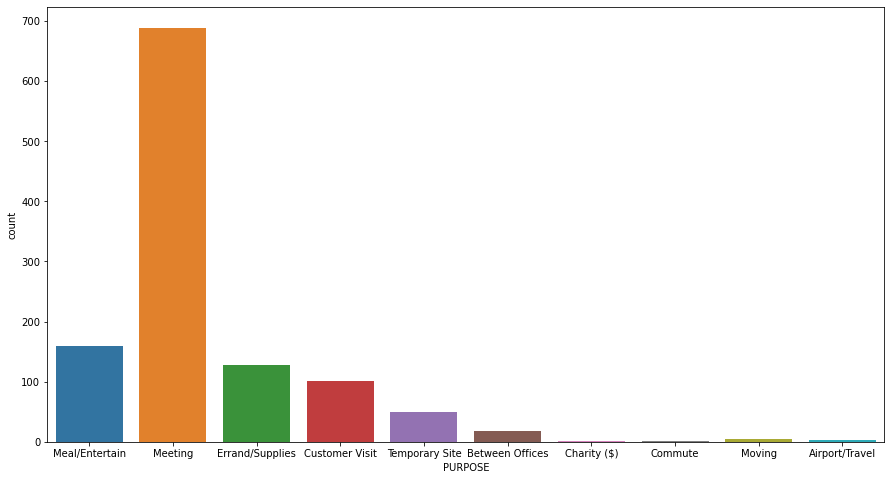

In [89]:
plt.figure(figsize=(15,8))
sns.countplot(df['PURPOSE'])
plt.show()

Q. How many rides are for Business and personal purpose 

In [90]:
df['CATEGORY'].value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

Q. Show above question in grahical format

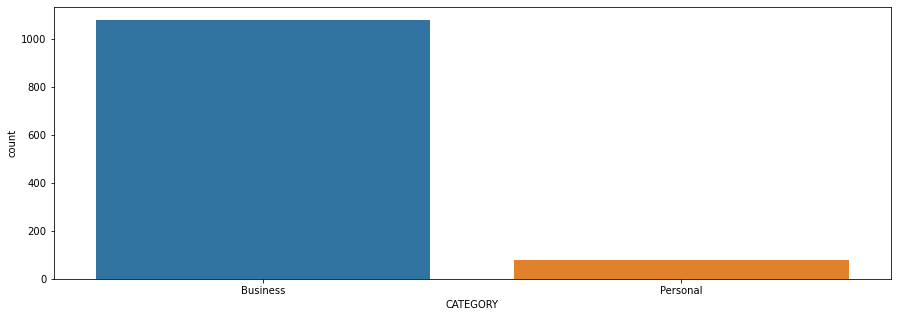

In [91]:
plt.figure(figsize=(15,5))
sns.countplot(df['CATEGORY'])
plt.show()

converting object dtype to datetime of date and time columns

In [92]:
df["START_DATE"]=pd.to_datetime(df["START_DATE"],format="%m/%d/%Y %H:%M")

In [93]:
df["END_DATE"]=pd.to_datetime(df["END_DATE"],format="%m/%d/%Y %H:%M")

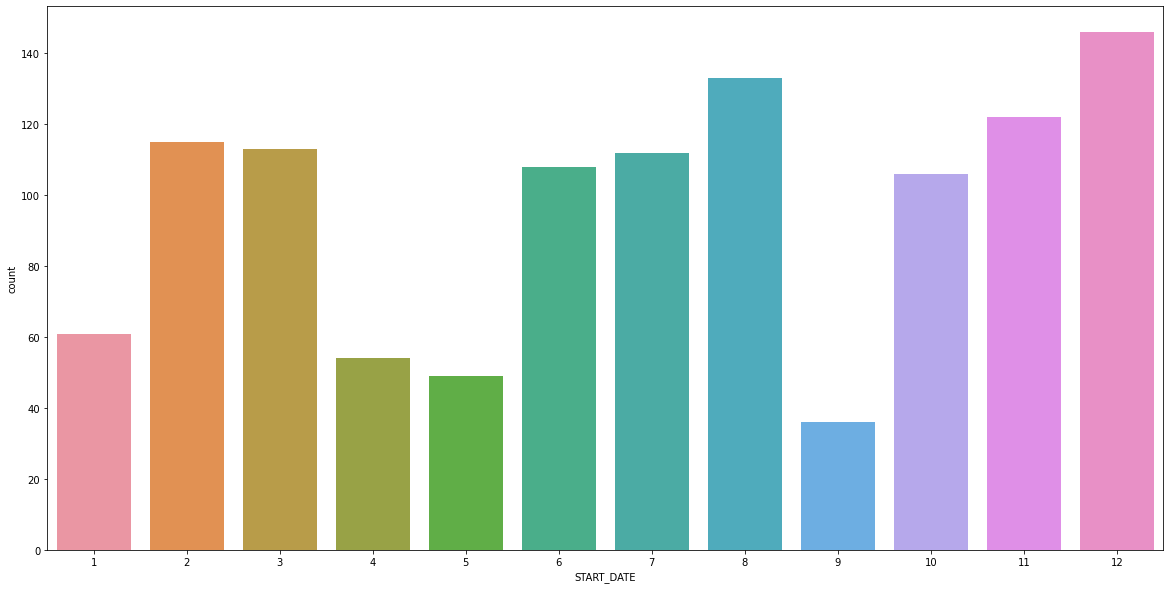

In [94]:
plt.figure(figsize=(20,10))
sns.countplot(df['START_DATE'].dt.month)
plt.show()

Q.what is the relationship between Purpose and Miles.

In [95]:
Pur_Mil = df.groupby('PURPOSE').mean()
Pur_Mil

,MILES
PURPOSE,
Airport/Travel,5.500000
Between Offices,10.944444
Charity ($),15.100000
Commute,180.200000
Customer Visit,20.688119
Errand/Supplies,3.968750
Meal/Entertain,5.698125
Meeting,11.240639
Moving,4.550000


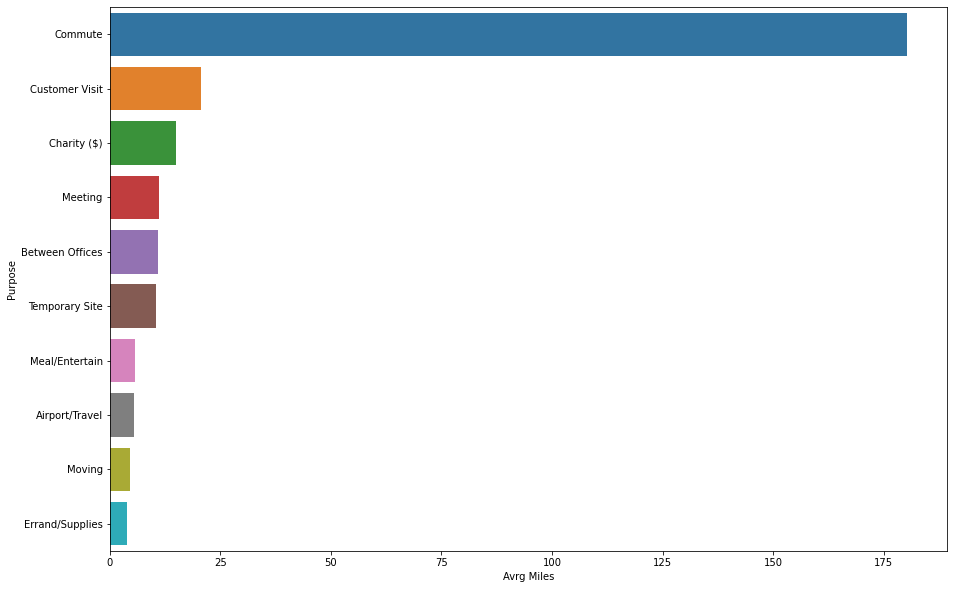

In [96]:
plt.figure(figsize=(15,10))
Pur_Mil['PURPOSE']=Pur_Mil.index.tolist()
ax = sns.barplot(x='MILES',y='PURPOSE',data=Pur_Mil,order=Pur_Mil.sort_values('MILES',ascending=False)['PURPOSE'].tolist())
ax.set(xlabel='Avrg Miles', ylabel='Purpose')
plt.show()

In [99]:
df['Hour']=df['START_DATE'].apply(lambda time:time.hour)
df['Month']=df['START_DATE'].apply(lambda time:time.month)

In [100]:
df['Dayofweek']=df['START_DATE'].apply(lambda time:time.dayofweek)

In [101]:
days={0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'fri',5:'Sat',6:'Sun'}

In [102]:
df['Dayofweek']=df['Dayofweek'].map(days)

In [105]:
months={1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'oct',11:'nov',12:'dec'}

In [106]:
df['Month']=df['END_DATE']-df['START_DATE']

In [109]:
df['duration']=df['END_DATE']-df['START_DATE']

In [110]:
df['duration']=df['duration'].astype(str)

In [111]:
df['duration']=df['duration'].map(lambda x:x[7:])

In [112]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Hour,Month,Dayofweek,duration
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,0 days 00:06:00,fri,00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meeting,1,0 days 00:12:00,Sat,00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,0 days 00:13:00,Sat,00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,0 days 00:14:00,Tue,00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,0 days 01:07:00,Wed,01:07:00
...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Karchi,Karchi,0.7,Meeting,1,0 days 00:07:00,Sat,00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Karchi,Unknown Location,3.9,Temporary Site,13,0 days 00:18:00,Sat,00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,0 days 00:35:00,Sat,00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,0 days 00:18:00,Sat,00:18:00


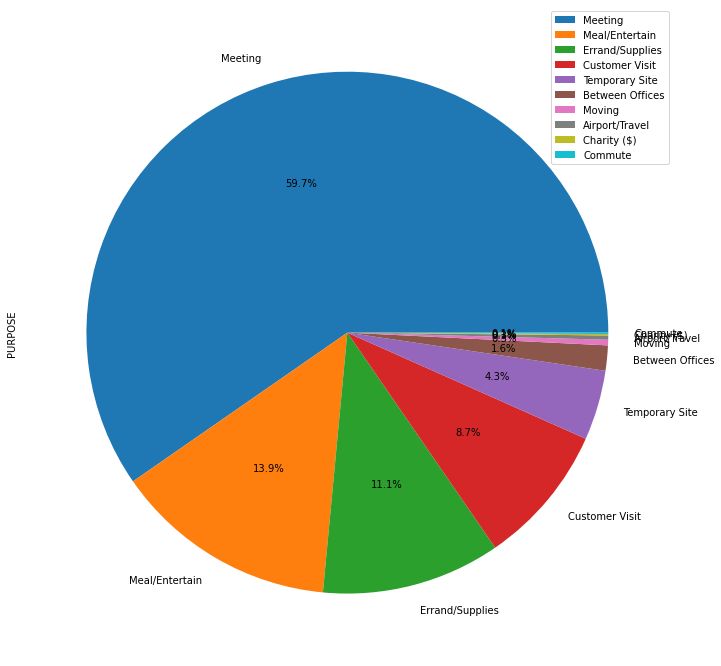

In [114]:
plt.figure(figsize=(12,12))
df['PURPOSE'].value_counts()[:11].plot(kind='pie',autopct='%1.1f%%',legend = True)
plt.show()

In this dataset maximum peoples are riding for Meeting purpose that is 59.7%